## **Preprocessing the data**

##### **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

##### **Loading the dataset and printing first 5 rows**

In [ ]:
# Reading the dataset from a CSV file into a Pandas DataFrame
# The 'pd.read_csv()' function is used to load data from a CSV file into a DataFrame.
df = pd.read_csv("machine_failure_dataset.csv")

In [ ]:
# Printing a message to indicate that the first 5 rows of the dataset will be displayed
# The '\n' adds a newline for better readability when printed
print("\n First 5 rows of data:")

# Using the 'head()' function to display the first 5 rows of the DataFrame (default behavior)
# This is useful for getting a quick preview of the data and its structure
print(df.head())


 First 5 rows of data:
   Temperature  Vibration  Power_Usage   Humidity Machine_Type  Failure_Risk
0    74.967142  56.996777     8.649643  20.460962         Mill             1
1    68.617357  54.623168     9.710963  25.698075        Lathe             0
2    76.476885  50.298152     8.415160  27.931972        Drill             1
3    85.230299  46.765316     9.384077  39.438438        Lathe             1
4    67.658466  53.491117     6.212771  32.782766        Drill             1


##### **Checking for missing values**

In [ ]:
# Printing a message to indicate that the missing values in the dataset will be checked
# The '\n' adds a newline for better readability when printed
print("\n Checking missing values:")

# Using the 'isnull()' function to check for missing values (NaN) in the DataFrame
# The 'sum()' function is then used to count the number of missing values in each column
# This helps in understanding the completeness of the dataset and deciding how to handle missing data
print(df.isnull().sum())


 Checking missing values:
Temperature     0
Vibration       0
Power_Usage     0
Humidity        0
Machine_Type    0
Failure_Risk    0
dtype: int64


No missing values in the dataset.

##### **Checking Data Types & Convert Categorical Features**

In [ ]:
# Printing a message to indicate that the data types of the columns will be displayed
# The '\n' adds a newline for better readability when printed
print("\n Data Types:")

# Using the 'dtypes' attribute to display the data types of each column in the DataFrame
# This is useful for understanding the kind of data each column holds (e.g., integers, floats, strings)
# and ensures that the data types are appropriate for any further analysis or modeling
print(df.dtypes)


 Data Types:
Temperature     float64
Vibration       float64
Power_Usage     float64
Humidity        float64
Machine_Type     object
Failure_Risk      int64
dtype: object


In [ ]:
# Checking if the data type of the 'Machine_Type' column is 'object' (indicating categorical or string data)
# This is useful because categorical data (e.g., strings) should be converted to numeric codes for machine learning models
if df['Machine_Type'].dtype == 'object':

    # Converting the 'Machine_Type' column to a categorical type
    # The 'astype('category')' method converts the column into a categorical data type
    # The 'cat.codes' property assigns a unique integer code to each category (string)
    # This conversion is necessary because machine learning algorithms usually require numerical data
    df['Machine_Type'] = df['Machine_Type'].astype('category').cat.codes

In [ ]:
# Printing the first 5 rows of the DataFrame after transformations or processing
# This allows you to quickly verify that the changes (such as converting 'Machine_Type' to numeric codes) have been applied correctly
print(df.head())

   Temperature  Vibration  Power_Usage   Humidity  Machine_Type  Failure_Risk
0    74.967142  56.996777     8.649643  20.460962             2             1
1    68.617357  54.623168     9.710963  25.698075             1             0
2    76.476885  50.298152     8.415160  27.931972             0             1
3    85.230299  46.765316     9.384077  39.438438             1             1
4    67.658466  53.491117     6.212771  32.782766             0             1


There are 3 different types of Machine types available in the dataset named Mill, Lathe, Drill. These categorial values mapped to integers using Label encoding.

##### **Analyzing class imbalance**

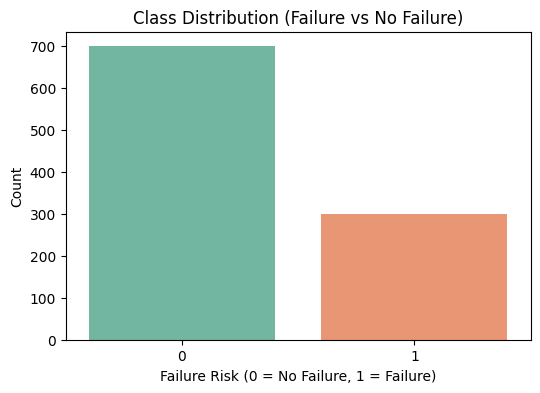

In [ ]:
# Creating a figure with a specified size of 6x4 inches for better readability of the plot
# The 'plt.figure(figsize=(6,4))' function sets the figure dimensions
plt.figure(figsize=(6,4))

# Creating a count plot using Seaborn to visualize the distribution of the 'Failure_Risk' column
# The 'x' parameter is set to 'Failure_Risk', which represents the class labels (failure or no failure)
# The 'data' parameter specifies the DataFrame to use
# The 'palette' parameter is set to 'Set2', a color palette for better aesthetics
# The 'hue' parameter is set to 'Failure_Risk', so different colors are used for different classes (0 = No Failure, 1 = Failure)
# The 'legend=False' hides the legend, as it's unnecessary in this case (the color meaning is clear from the x-axis labels)
sns.countplot(x='Failure_Risk', data=df, palette="Set2", hue='Failure_Risk', legend=False)

# Setting the title of the plot to describe the data being displayed
plt.title("Class Distribution (Failure vs No Failure)")

# Labeling the x-axis to explain what the numbers (0 and 1) represent in the context of failure risk
plt.xlabel("Failure Risk (0 = No Failure, 1 = Failure)")

# Labeling the y-axis to indicate that it represents the count of samples in each class
plt.ylabel("Count")

# Displaying the plot to show the visual representation of the class distribution
plt.show()

In [ ]:
# Using the 'value_counts()' function to count the occurrences of each unique value in the 'Failure_Risk' column
# This helps in determining the distribution of the target variable (Failure vs No Failure) in the dataset
failure_counts = df['Failure_Risk'].value_counts()

# Printing a message to indicate that the class distribution will be displayed
# The '\n' adds a newline for better readability when printed
print("\n Class Distribution:")

# Printing the counts of each class (Failure and No Failure) in the 'Failure_Risk' column
# This gives a clear view of how balanced or imbalanced the dataset is for the target variable
print(failure_counts)


 Class Distribution:
Failure_Risk
0    700
1    300
Name: count, dtype: int64


##### **Handling imbalance data using SMOTE**

In [ ]:
# Separating the features (X) and the target variable (y)
# 'X' contains all columns except 'Failure_Risk', which will be used as the features
# 'y' contains only the 'Failure_Risk' column, which is the target variable for prediction
X = df.drop(columns=["Failure_Risk"])
y = df["Failure_Risk"]

# Checking if the class distribution is imbalanced by comparing the minimum and maximum class counts
# If the ratio between the smallest and largest class counts is less than 0.5, it indicates a significant class imbalance
if failure_counts.min() / failure_counts.max() < 0.5:

    # Applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes
    # SMOTE generates synthetic samples to increase the number of minority class samples (e.g., 'Failure' class)
    # 'sampling_strategy="auto"' means it will balance the classes by creating as many samples as needed
    # The 'random_state=42' ensures reproducibility of the results
    smote = SMOTE(sampling_strategy='auto', random_state=42)

    # Performing the resampling and storing the new features and target in X_resampled and y_resampled
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Creating a new DataFrame with the resampled features
    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)

    # Adding the resampled target variable ('Failure_Risk') to the DataFrame
    df_resampled["Failure_Risk"] = y_resampled

    # Printing a message to confirm that SMOTE has been applied
    print("\n Applied SMOTE to balance classes")

    # Displaying the new class distribution after SMOTE to verify the balance
    print(df_resampled["Failure_Risk"].value_counts())


 Applied SMOTE to balance classes
Failure_Risk
1    700
0    700
Name: count, dtype: int64


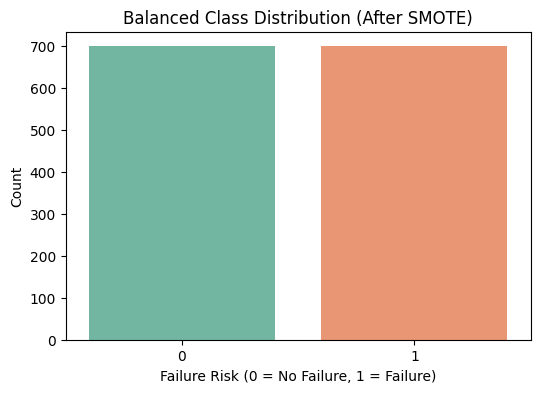

In [ ]:
# Creating a figure with a specified size of 6x4 inches to visualize the class distribution after SMOTE
# The 'plt.figure(figsize=(6,4))' function sets the figure dimensions
plt.figure(figsize=(6,4))

# Creating a count plot using Seaborn to visualize the distribution of the 'Failure_Risk' column after SMOTE
# The 'x' parameter is set to 'Failure_Risk', which represents the class labels (failure or no failure)
# The 'data' parameter specifies the resampled DataFrame (df_resampled)
# The 'palette' parameter is set to 'Set2', a color palette for better aesthetics
# The 'hue' parameter is set to 'Failure_Risk', so different colors are used for different classes (0 = No Failure, 1 = Failure)
# The 'legend=False' hides the legend, as it's unnecessary in this case (the color meaning is clear from the x-axis labels)
sns.countplot(x='Failure_Risk', data=df_resampled, palette="Set2", hue='Failure_Risk', legend=False)

# Setting the title of the plot to indicate that the plot shows the balanced class distribution after SMOTE
plt.title("Balanced Class Distribution (After SMOTE)")

# Labeling the x-axis to explain what the numbers (0 and 1) represent in the context of failure risk
plt.xlabel("Failure Risk (0 = No Failure, 1 = Failure)")

# Labeling the y-axis to indicate that it represents the count of samples in each class
plt.ylabel("Count")

# Displaying the plot to show the visual representation of the class distribution after applying SMOTE
plt.show()

##### **Saving the balanced dataset**

In [ ]:
# Saving the resampled DataFrame (df_resampled) to a new CSV file
# The 'to_csv()' function writes the DataFrame to a CSV file
# 'index=False' ensures that the index is not included as a separate column in the saved file
# The file will be saved in the current working directory with the name 'balanced_machine_failure_dataset.csv'
df_resampled.to_csv("balanced_machine_failure_dataset.csv", index=False)

# Printing a message to confirm that the balanced dataset has been saved successfully
# This informs the user that the data is now stored and ready for further use or analysis
print("Balanced dataset saved as 'balanced_machine_failure_dataset.csv'")

Balanced dataset saved as 'balanced_machine_failure_dataset.csv'


## **Feature Engineering**

In [ ]:
# Reading the balanced dataset from the CSV file 'balanced_machine_failure_dataset.csv' into a Pandas DataFrame
# The 'pd.read_csv()' function is used to load data from a CSV file back into a DataFrame for further analysis or modeling
df = pd.read_csv('balanced_machine_failure_dataset.csv')

##### **Scaling and Normalization (Using StandardScaler)**

In [ ]:
# Initializing the MinMaxScaler to scale numerical features to a range between 0 and 1
# This is useful for normalizing the data, especially when using algorithms sensitive to feature scaling
scaler = MinMaxScaler()

# Defining the list of numerical columns that need to be scaled
# These columns contain continuous values that benefit from scaling for machine learning models
numerical_columns = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']

# Printing the first 5 rows of the numerical columns before scaling
# This allows you to see the original values of the features before applying the scaling
print("Before Scaling:")
print(df[numerical_columns].head())

# Applying the MinMaxScaler to scale the numerical columns
# 'fit_transform()' computes the scaling parameters and applies the transformation to the data
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Printing the first 5 rows of the numerical columns after scaling
# This shows the transformed values, which should now be in the range [0, 1]
print("\n After Scaling:")
print(df[numerical_columns].head())

# Printing the minimum and maximum values of each numerical column after scaling
# The scaled values should be between 0 and 1, so the minimum should be 0 and the maximum should be 1
print("\n Min and Max values after scaling:")
print(df[numerical_columns].min())  # Min value of each column
print(df[numerical_columns].max())  # Max value of each column

Before Scaling:
   Temperature  Vibration  Power_Usage   Humidity
0    74.967142  56.996777     8.649643  20.460962
1    68.617357  54.623168     9.710963  25.698075
2    76.476885  50.298152     8.415160  27.931972
3    85.230299  46.765316     9.384077  39.438438
4    67.658466  53.491117     6.212771  32.782766

 After Scaling:
   Temperature  Vibration  Power_Usage  Humidity
0     0.526922   0.707548     0.337521  0.165514
1     0.437412   0.630150     0.413921  0.335204
2     0.548204   0.489121     0.320641  0.407586
3     0.671595   0.373922     0.390390  0.780414
4     0.423895   0.593236     0.162099  0.564760

 Min and Max values after scaling:
Temperature    0.0
Vibration      0.0
Power_Usage    0.0
Humidity       0.0
dtype: float64
Temperature    1.0
Vibration      1.0
Power_Usage    1.0
Humidity       1.0
dtype: float64


##### **Correlation Matrix**

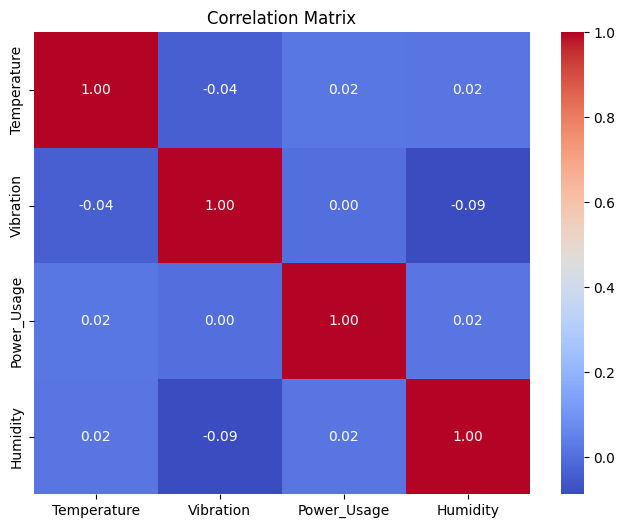

In [ ]:
# Calculating the correlation matrix for the selected numerical columns
# The 'corr()' function computes the pairwise correlation coefficients between the numerical columns in the DataFrame
# Correlation helps to understand the relationship between features (e.g., positive, negative, or no correlation)
correlation_matrix = df[['Temperature', 'Vibration', 'Power_Usage', 'Humidity']].corr()

# Creating a figure with a specified size of 8x6 inches to ensure the heatmap is clear and readable
plt.figure(figsize=(8, 6))

# Creating a heatmap using Seaborn to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Setting the title of the heatmap to indicate that it represents the correlation matrix
plt.title('Correlation Matrix')

# Displaying the heatmap to visualize the relationships between features
plt.show()


##### **Outlier detection (Z-Score Method)**

In [ ]:
# Defining a list of column names that represent the numerical features of interest in the dataset
z_columns = [ 'Temperature', 'Vibration', 'Power_Usage', 'Humidity']

In [ ]:
# Calculating the Z-scores for the numerical columns in 'z_columns' (Temperature, Vibration, Power_Usage, and Humidity)
# Z-score is a standardization technique that transforms the data to have a mean of 0 and a standard deviation of 1
# The 'apply()' function applies the lambda function to each column to compute the Z-score for each value
# The lambda function computes the Z-score as (x - mean) / std for each element in the column
df_z_scores = df[z_columns].apply(lambda x: (x - x.mean()) / x.std())

# Identifying outliers by checking if any Z-score is greater than 3 or less than -3
# Typically, a Z-score greater than 3 or less than -3 is considered an outlier (i.e., values far from the mean)
# The 'np.abs(df_z_scores)' computes the absolute value of the Z-scores, and 'any(axis=1)' checks if any value in a row is greater than 3
outliers = (np.abs(df_z_scores) > 3).any(axis=1)

# Creating a new DataFrame ('df_no_outliers') by excluding the rows that contain outliers
# The '~outliers' condition selects only the rows where no outliers were detected (i.e., where outliers is False)
df_no_outliers = df[~outliers]

In [ ]:
# Printing the shape (number of rows and columns) of the original DataFrame before removing outliers
# The '.shape' attribute returns a tuple (number of rows, number of columns) for the DataFrame
print(f"Original data shape: {df.shape}")

# Printing the shape of the DataFrame after removing the rows containing outliers
# The '.shape' attribute is used again to show the number of rows and columns in the DataFrame 'df_no_outliers'
# This helps to verify how many rows were removed by comparing the shapes before and after outlier removal
print(f"Data shape after removing outliers: {df_no_outliers.shape}")

Original data shape: (1400, 6)
Data shape after removing outliers: (1381, 6)


In [ ]:
# Saving the preprocessed DataFrame (df_no_outliers) to a new CSV file called 'preprocessed_machine_failure_dataset.csv'
# The 'to_csv()' function is used to write the DataFrame to a CSV file, with the 'index=False' argument to exclude the index from being saved as a separate column in the file
# This ensures the cleaned dataset (after removing outliers) is saved for future use or analysis
df_no_outliers.to_csv("preprocessed_machine_failure_dataset.csv", index=False)

# Printing a confirmation message that the preprocessed dataset has been saved successfully
# This provides feedback to the user that the dataset is stored with the applied modifications (e.g., outlier removal)
print("Preprocessed dataset saved as 'preprocessed_machine_failure_dataset.csv'")

Preprocessed dataset saved as 'preprocessed_machine_failure_dataset.csv'


## **Model Selection, Training and Evaluation**

In [ ]:
# Reading the preprocessed dataset from the CSV file 'preprocessed_machine_failure_dataset.csv' back into a Pandas DataFrame
# The 'pd.read_csv()' function loads the cleaned dataset (with outliers removed) for further analysis or model building
df = pd.read_csv("preprocessed_machine_failure_dataset.csv")

In [ ]:
# Selecting the feature columns (X) that will be used as input for the machine learning model
X = df[['Temperature', 'Vibration', 'Power_Usage', 'Humidity', 'Machine_Type']]

# Selecting the target column (y) that the model will try to predict
y = df['Failure_Risk']

In [ ]:
# Splitting the data into training and testing sets using 'train_test_split' from scikit-learn
# The 'X' and 'y' variables are split into training and testing data
# 'test_size=0.3' means 30% of the data will be used for testing, and 70% will be used for training the model
# 'random_state=42' ensures reproducibility of the split by fixing the random seed, so the split is consistent across different runs
# The function returns four variables: X_train, X_test, y_train, and y_test, which will be used for training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initializing the RandomForestClassifier model from scikit-learn
# RandomForestClassifier is an ensemble learning algorithm that creates multiple decision trees and merges them together to get a more accurate and stable prediction
# 'random_state=42' ensures the results are reproducible by fixing the random seed, so the model's behavior is consistent across different runs
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Defining a parameter grid for hyperparameter tuning using GridSearchCV
# The parameter grid specifies different values for the hyperparameters of the RandomForestClassifier to explore during the search for the best model configuration
# 'n_estimators' specifies the number of trees in the forest (100, 200, or 300 trees)
# 'max_depth' controls the maximum depth of each tree (10, 20, or no limit)
# 'min_samples_split' is the minimum number of samples required to split an internal node (2, 5, or 10 samples)
# 'min_samples_leaf' is the minimum number of samples required to be at a leaf node (1, 2, or 4 samples)
# 'bootstrap' specifies whether bootstrap samples are used when building trees (True or False)
# This grid will be used in GridSearchCV to find the optimal combination of hyperparameters for the model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Initializing the GridSearchCV object to perform hyperparameter tuning using cross-validation
# GridSearchCV exhaustively tests all possible combinations of hyperparameters specified in 'param_grid'
# 'estimator=rf_model' specifies the model (RandomForestClassifier) that we want to tune
# 'param_grid=param_grid' is the dictionary containing the hyperparameters and their possible values for the search
# 'cv=3' means that 3-fold cross-validation will be used during the search to evaluate the model’s performance on different subsets of the training data
# 'n_jobs=-1' uses all available CPU cores for parallel processing, speeding up the search
# 'verbose=2' provides detailed output during the search process to track the progress
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# Extracting the best RandomForest model from the grid search based on the highest performance during cross-validation
# 'grid_search.best_estimator_' returns the model with the optimal hyperparameters found during the GridSearchCV process
best_rf_model = grid_search.best_estimator_

# Printing the best hyperparameters found during the grid search
# 'grid_search.best_params_' returns a dictionary containing the hyperparameter values that resulted in the best model performance
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Using the best RandomForest model (best_rf_model) to make predictions on the test set (X_test)
# The 'predict()' function generates predicted labels (Failure_Risk) based on the feature values in the test set
# 'y_pred' will contain the predicted target values that can be compared with the actual values (y_test) for evaluation
y_pred = best_rf_model.predict(X_test)

In [ ]:
# Evaluating the performance of the RandomForest model on the test set by calculating various classification metrics

# 'accuracy_score()' computes the accuracy of the model, which is the proportion of correct predictions out of all predictions
# It compares the predicted labels (y_pred) to the actual labels (y_test) to determine how often the model is correct
print("Accuracy: ", accuracy_score(y_test, y_pred))

# 'precision_score()' calculates the precision of the model, which is the proportion of true positive predictions among all positive predictions
# This metric is important for measuring how many of the predicted failures were actual failures
print("Precision: ", precision_score(y_test, y_pred))

# 'recall_score()' calculates the recall of the model, which is the proportion of true positive predictions among all actual positive instances
# Recall is important for evaluating how many of the actual failures were correctly identified by the model
print("Recall: ", recall_score(y_test, y_pred))

# 'f1_score()' computes the F1-Score, which is the harmonic mean of precision and recall, providing a balanced measure of model performance
# It is especially useful when there is an uneven class distribution, as it combines both precision and recall into a single value
print("F1-Score: ", f1_score(y_test, y_pred))

# 'classification_report()' generates a detailed report with precision, recall, F1-score, and support for each class in the target variable
# It provides a comprehensive evaluation of the model's performance across all classes
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Accuracy:  0.7204819277108434
Precision:  0.6936170212765957
Recall:  0.7874396135265701
F1-Score:  0.7375565610859729
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       208
           1       0.69      0.79      0.74       207

    accuracy                           0.72       415
   macro avg       0.72      0.72      0.72       415
weighted avg       0.72      0.72      0.72       415



##### **Confusion Matrix**

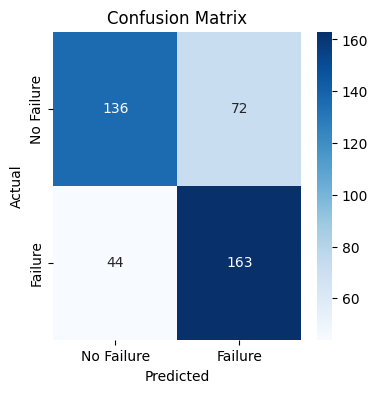

In [ ]:
# Generating the confusion matrix to evaluate the performance of the model in terms of true positives, false positives, true negatives, and false negatives
# 'confusion_matrix()' compares the actual labels (y_test) with the predicted labels (y_pred)
# It returns a 2x2 matrix:
# - True Positive (TP) - correctly predicted failures
# - False Positive (FP) - incorrectly predicted failures (actual no failure)
# - True Negative (TN) - correctly predicted no failures
# - False Negative (FN) - incorrectly predicted no failures (actual failure)
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a heatmap to visualize the confusion matrix
# The 'sns.heatmap()' function is used to display the confusion matrix as a colored grid
# 'annot=True' adds the numeric values inside the cells of the heatmap
# 'fmt='d'' ensures the values are displayed as integers
# 'cmap='Blues'' sets the color scheme to shades of blue
# 'xticklabels' and 'yticklabels' are used to label the axes as 'No Failure' and 'Failure'
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])

# Adding title and axis labels to the plot
plt.title('Confusion Matrix')
plt.ylabel('Actual')  # Actual class labels
plt.xlabel('Predicted')  # Predicted class labels
plt.show()  # Display the heatmap

##### **ROC Curve**

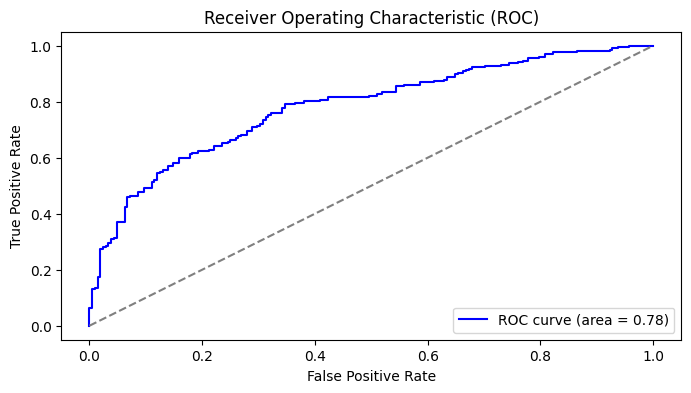

In [ ]:
# Calculating the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) for the model's performance
# 'roc_curve()' computes the False Positive Rate (FPR) and True Positive Rate (TPR) at various threshold values
# 'best_rf_model.predict_proba(X_test)[:, 1]' gives the predicted probabilities for the positive class (Failure)
# The probabilities are used to compute the ROC curve
# 'fpr' is the False Positive Rate, and 'tpr' is the True Positive Rate, both of which are used to plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Calculating the AUC (Area Under the Curve) which summarizes the overall performance of the classifier
# AUC is a measure of the ability of the model to discriminate between positive and negative classes
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
# The 'plt.plot()' function is used to plot the ROC curve with FPR on the x-axis and TPR on the y-axis
# The label includes the AUC value, which provides a measure of the model's performance (closer to 1.0 is better)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)

# Plotting a diagonal line to represent a random classifier (where the FPR = TPR)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Adding labels and title to the plot
plt.xlabel('False Positive Rate')  # FPR on the x-axis
plt.ylabel('True Positive Rate')   # TPR on the y-axis
plt.title('Receiver Operating Characteristic (ROC)')  # Title of the plot
plt.legend(loc='lower right')  # Positioning the legend in the lower-right corner
plt.show()  # Display the plot

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Accuracy:  0.7204819277108434
Precision:  0.6936170212765957
Recall:  0.7874396135265701
F1-Score:  0.7375565610859729
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       208
           1       0.69      0.79      0.74       207

    accuracy                           0.72       415
   macro avg       0.72      0.72      0.72       415
weighted avg       0.72      0.72      0.72       415



### **Conclusion**

The machine failure prediction model demonstrated reliable performance with an overall accuracy of 72% and an F1-score of 0.74, indicating a good balance between precision and recall. Most notably, the model achieved a recall of 78.7%, which is crucial in applications where detecting potential failures early is more important than avoiding false alarms. This high recall ensures that the majority of actual failures are successfully identified, minimizing the risk of unexpected breakdowns and reducing unplanned downtime.

While the precision of 69% indicates a few false alarms, this is a worthwhile trade-off when the priority is to avoid missing actual failures. In high-risk environments, early detection can prevent costly downtime and equipment damage. The model proves to be a reliable tool for identifying failures in advance, making it highly valuable for predictive maintenance. Its performance shows strong potential for real-world implementation, offering a data-driven solution to enhance system reliability and ensure smoother operations.

### **Business Impact**

Implementing a predictive maintenance system using machine learning can significantly enhance operational efficiency and reduce costs in industrial settings. The key business benefits of this model include:  

- **Reduced Downtime:** By predicting machine failures before they occur, companies can schedule timely maintenance, avoiding unexpected breakdowns and costly disruptions.  
- **Cost Savings:** Preventative maintenance reduces the need for emergency repairs, minimizing labor and replacement costs while extending equipment lifespan.  
- **Improved Productivity:** Ensuring machines operate smoothly without sudden failures leads to better workflow continuity and higher overall productivity.  
- **Resource Optimization:** By using sensor data to identify machines at risk, maintenance efforts can be focused only on necessary interventions, optimizing resource allocation.  
- **Data-Driven Decision Making:** The model provides actionable insights, allowing businesses to plan maintenance schedules efficiently and reduce unnecessary downtime.  

Overall, integrating machine learning for predictive maintenance enhances operational reliability, reduces maintenance expenses, and improves business profitability.

### **Additional Models**

- I have also tried different algorithms other than Random Forest, like XGB, MLP, SVM with PCA and also Stacking classifier including 3 classifier algorithms Random forest, XGB and LGBM.
- When compared Random forest alone performs better with accuracy of 72%

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_
print("Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)

y_pred_xgb = best_xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_accuracy)
print("Classification Report:\n", classification_rep_xgb)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1}
XGBoost Accuracy: 0.7060240963855422
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68       208
           1       0.68      0.78      0.73       207

    accuracy                           0.71       415
   macro avg       0.71      0.71      0.70       415
weighted avg       0.71      0.71      0.70       415



In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128, 64),
                          activation='relu',
                          solver='adam',
                          learning_rate_init=0.001,
                          max_iter=1000,
                          random_state=42)

mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)
print("Improved MLP Accuracy:", mlp_accuracy)
print("Classification Report:\n", classification_rep_mlp)


Improved MLP Accuracy: 0.6024096385542169
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.77      0.66       208
           1       0.65      0.43      0.52       207

    accuracy                           0.60       415
   macro avg       0.61      0.60      0.59       415
weighted avg       0.61      0.60      0.59       415



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
classification_rep_svm = classification_report(y_test, y_pred_svm)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_rep_svm)

SVM Accuracy: 0.5927710843373494
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.40      0.50       208
           1       0.57      0.78      0.66       207

    accuracy                           0.59       415
   macro avg       0.61      0.59      0.58       415
weighted avg       0.61      0.59      0.58       415



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb

rf_model = RandomForestClassifier(random_state=42)  # Define it or use your best model after tuning
xgb_model = XGBClassifier(random_state=42)  # Define XGB model
lgbm_model = lgb.LGBMClassifier(random_state=42)  # Define LightGBM model

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

base_learners = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model),
]
stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)
stack_accuracy = accuracy_score(y_test, y_pred_stack)
classification_rep_stack = classification_report(y_test, y_pred_stack)
print("Stacking Classifier Accuracy:", stack_accuracy)
print("Classification Report:\n", classification_rep_stack)

[LightGBM] [Info] Number of positive: 486, number of negative: 480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 966, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503106 -> initscore=0.012423
[LightGBM] [Info] Start training from score 0.012423
[LightGBM] [Info] Number of positive: 486, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 966, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503106 -> initscore=0.012423
[LightGBM] [Info] S